In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Phishing Data.xlsx')

In [3]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

No missing value!

In [5]:
print('Unique values for all columns : ')
for col in data.columns:
    print(f'{col} : {data[col].unique()}')

Unique values for all columns : 
having_IP_Address : [1 0]
URL_Length : [ 1  0 -1]
Shortining_Service : [0 1]
having_At_Symbol : [0 1]
double_slash_redirecting : [1 0]
Prefix_Suffix : [-1  0  1]
having_Sub_Domain : [-1  0  1]
SSLfinal_State : [-1  1  0]
Domain_registeration_length : [ 0  1 -1]
Favicon : [0 1]
port : [0 1]
HTTPS_token : [1 0]
Request_URL : [ 1 -1]
URL_of_Anchor : [-1  0  1]
Links_in_tags : [ 1 -1  0]
SFH : [-1  1]
Submitting_to_email : [1 0]
Abnormal_URL : [1 0]
Redirect : [0 1]
on_mouseover : [0 1]
RightClick : [0 1]
popUpWidnow : [0 1]
Iframe : [0 1]
age_of_domain : [-1  0  1]
DNSRecord : [1 0]
web_traffic : [-1  0  1]
Page_Rank : [-1  0  1]
Google_Index : [0 1]
Links_pointing_to_page : [ 1  0 -1]
Statistical_report : [1 0]
Result : [1 0]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

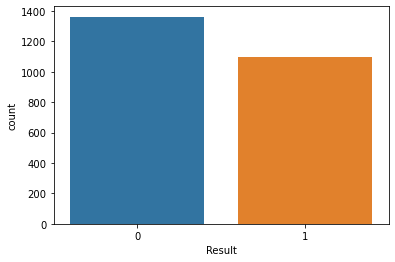

In [6]:
sns.countplot(data.Result)

Dataset is pretty much balanced.

<AxesSubplot:>

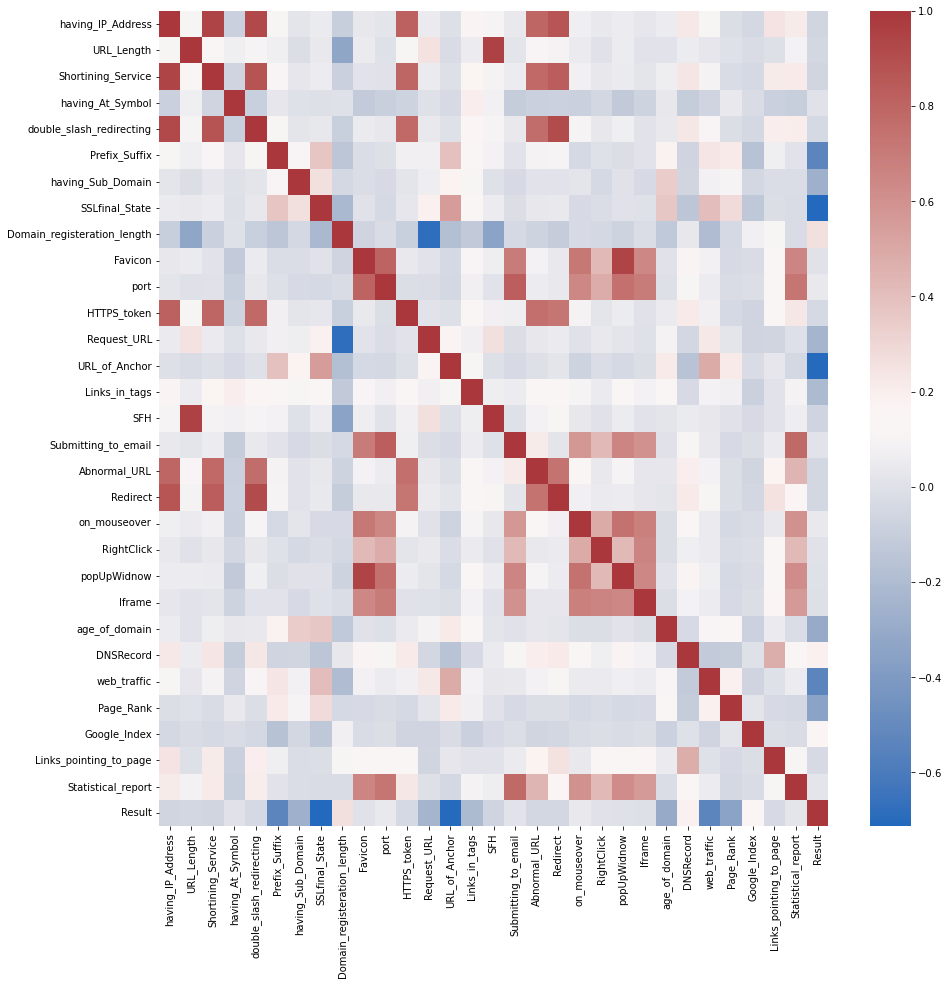

In [7]:
cor = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cmap='vlag')

In [8]:
cor.Result.sort_values()

SSLfinal_State                -0.712876
URL_of_Anchor                 -0.699608
Prefix_Suffix                 -0.537020
web_traffic                   -0.535545
Page_Rank                     -0.350812
age_of_domain                 -0.300330
having_Sub_Domain             -0.266514
Request_URL                   -0.243759
Links_in_tags                 -0.204575
SFH                           -0.067708
having_IP_Address             -0.061623
Shortining_Service            -0.061175
URL_Length                    -0.055605
Redirect                      -0.052760
Abnormal_URL                  -0.052093
double_slash_redirecting      -0.042536
HTTPS_token                   -0.039071
Links_pointing_to_page        -0.035779
Iframe                        -0.007565
popUpWidnow                    0.002677
Favicon                        0.005067
RightClick                     0.006811
having_At_Symbol               0.008336
Submitting_to_email            0.012178
Statistical_report             0.021377


In [9]:
X = data.drop(['Result'], axis=1)
Y = data[['Result']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_targets, test_targets = train_test_split(X, Y, test_size=0.2)

### Fitting a base model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

In [12]:
log_model = LogisticRegression()
log_model.fit(X_train,train_targets)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
logreg_pred= log_model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

target_names = ['Phishing', 'Legitamite']
print(classification_report(test_targets, logreg_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.94      0.96      0.95       281
  Legitamite       0.95      0.92      0.93       211

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



### Gradient Boosting Model

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, n_jobs=-1)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [16]:
%%time
model.fit(X_train, train_targets)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Progra

[13:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 1.2 s
Wall time: 453 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(classification_report(test_targets, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.99      0.99      0.99       281
  Legitamite       0.98      0.98      0.98       211

    accuracy                           0.98       492
   macro avg       0.98      0.98      0.98       492
weighted avg       0.98      0.98      0.98       492



### Feature Selection

In [20]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, train_targets)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

URL_of_Anchor                  0.342469
SSLfinal_State                 0.338270
Prefix_Suffix                  0.173151
web_traffic                    0.170790
Page_Rank                      0.077304
having_Sub_Domain              0.063334
age_of_domain                  0.041365
Request_URL                    0.033429
Domain_registeration_length    0.033289
Links_in_tags                  0.031630
DNSRecord                      0.026882
Statistical_report             0.022867
Favicon                        0.013807
Abnormal_URL                   0.013275
URL_Length                     0.006890
port                           0.006715
Google_Index                   0.004682
double_slash_redirecting       0.001891
Links_pointing_to_page         0.001888
having_IP_Address              0.000321
RightClick                     0.000000
popUpWidnow                    0.000000
Iframe                         0.000000
on_mouseover                   0.000000
Redirect                       0.000000


In [22]:
from sklearn.feature_selection import SelectKBest


sel_five_cols = SelectKBest(mutual_info_classif, k=19)
sel_five_cols.fit(X_train, train_targets)

X_train = X_train[sel_five_cols.get_feature_names_out()]
X_test = X_test[sel_five_cols.get_feature_names_out()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
model = XGBClassifier(random_state=42, n_jobs=-1)

model.fit(X_train,train_targets)

[13:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Progra

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
pred = model.predict(X_test)

In [25]:
print(classification_report(test_targets, pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.97      0.99      0.98       281
  Legitamite       0.98      0.96      0.97       211

    accuracy                           0.98       492
   macro avg       0.98      0.97      0.98       492
weighted avg       0.98      0.98      0.98       492



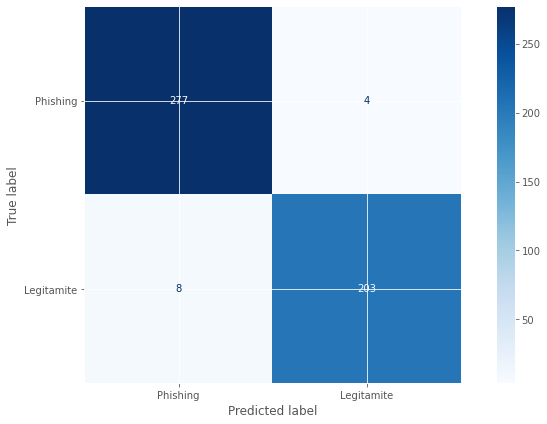

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

conf_mat = confusion_matrix(test_targets, pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=target_names)
disp.plot(cmap='Blues')
plt.tight_layout()
plt.style.use("ggplot")
plt.savefig('ConfusionMatrix.png')

In [26]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

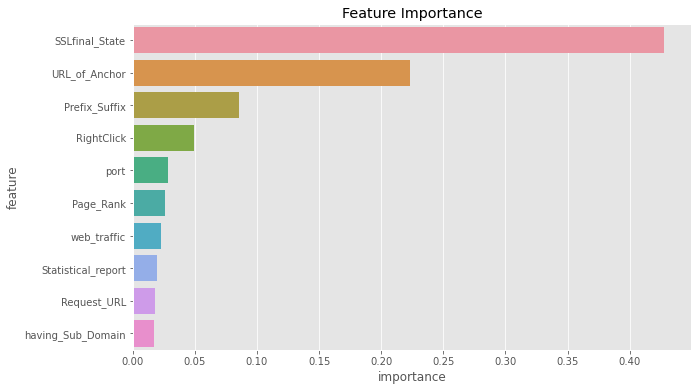

In [31]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.savefig('feature_importance.png')